# How to build a Thermodynamic Cycle with PYroMat

**EmirFirlar**, Steemit, 2018.

https://steemit.com/utopian-io/@emirfirlar/how-to-build-thermodynamic-cycle-with-pyromat

We import PYroMat first.

In [85]:
import pyromat as pyro

Then, we import numpy.

In [86]:
import numpy as np

Now, to do the graphics we import matplotlib.

In [87]:
import matplotlib.pyplot as plt

The Bryton Cycle is an air cycle. Here, air is used as a refrigerant in the cycle. The Brayton refrigeration cycle consists of 4 state changes:

(1-2): Adiabatic compression in compressor,

(2-3): Refrigeration of air at constant pressure,

(3-4): Reversible adiabatic expansion in turbine,

(4-1): Heat conduction from air to refrigate air at constant pressure.

So first, we communicate with air data:

In [88]:
air = pyro.get('ig.air')

At first, we determine the net power output of the turbine. Wnet is the output power we aim at. Let's take it to be 310 kW.

In [89]:
Wnet = 310.

We will configure the unit of pressure to the system. *PYroMat* accepts bar as a pressure unit.

In [90]:
pyro.config['unit_pressure'] = 'bar'

Under normal conditions 1 atm of pressure is equal to 1.013 bar. So we will stablish our initial pressure as 1.013 bar. 

In [91]:
p1 = 1.013

We will configure the unit of temperature to the system. The unit will be Kelvin. 

In [92]:
pyro.config['unit_temperature'] = 'K'

We determine the initial temperature of the system. Let's take it to be 300 Kelvin.

In [93]:
T1 = 300.

We determine the pressure ratio of the system. Let's take 10. For that, we will use the following command:

In [94]:
pr = 10.

We configure the unit of entropy to the system. For that, we will use the following command:

In [95]:
pyro.config['unit_energy'] = 'kJ'

The first entropy value is the function of the T1 and p1 values. We run our entropy value. For that, we will use the following command:

In [96]:
s1 = air.s(T1,p1)

Our second pressure will be p1 x pressure ratio. For that, we will use the following command:

In [97]:
p2 = p1*pr

The second temperature value is the function of the s1 and p2 values. For that, we will use the following command:

In [98]:
T2 = air.T_s(s=s1,p=p2)

Compressor entry power is wc. It shows us how much power we spend. Formula of wc = h2 - h1 (h= enthalpy) For that, we will use the following command:

In [99]:
wc = air.h(T2,p2) - air.h(T1,p1)

T3 is important for motor efficiency. The engine can burn if it is too hot. For that, we will use the following command:

In [100]:
T3 = 1400.

(1-2) and (3-4) are isentropic processes. So; will be p2=p3 and p1=p4. For that, we will use the following command:

In [101]:
p4 = p1
p3 = p2

Spent temperature is qh. It showing us how much heat we spend. Formula of qh = h3 - h2 . For that, we will use the following command:

In [102]:
qh = air.h(T3,p3) - air.h(T2,p2)

The third entropy value is the function of the T3 and p3 values. We run our entropy value. For that, we will use the following command:

In [103]:
s3 = air.s(T3,p3)

Because (3-4) is an isentropic process, s4 must be equal to s3. For that, we will use the following command:

In [104]:
s4 = s3

The fourth temperature value is the function of the s4 and p4 values. For that, we will use the following command:

In [105]:
T4 = air.T_s(s=s4,p=p4)

Turbine entry power is wt. It showing us how much work we spend. Formula of wt = h3 - h4. For that, we will use the following command:

In [106]:
wt = air.h(T3,p3) - air.h(T4,p4)

wnet shows the net work. For that, we will use the following command:

In [107]:
 wnet = wt - wc

mdot is the required mass flow. This is Output Power / Spend Work. For that, we will use the following command:

In [108]:
mdot = Wnet / wnet

We configure the unit of matter to the system. For that, we will use the following command:

In [109]:
pyro.config['unit_matter'] = 'kg'

n is the efficiency of system. Efficiency is spend net work / spent heat. For that, we will use the following command:

In [110]:
n = wnet / qh

So far we have defined the formulas of the Brayton cycle. We looked at how to import them. Now we will first build the T-s diagram. T-S diagram has a specific shape. In this diagram, we will build two separate sections. These are constant pressure heat function and isentropic compression line.

We will build constant pressure heat function. It consists of parts (2-3) and (1-4). It is returning data at specified intervals. Numpy gives us this feature. For that, we will use the following command:

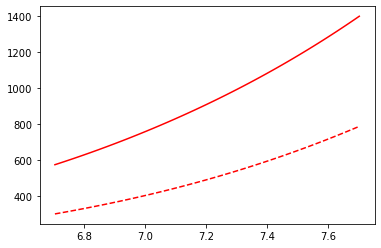

In [111]:
T = np.linspace(T2,T3)
plt.plot(air.s(T=T,p=p2),T,'r',linewidth=1.5)
T = np.linspace(T1,T4)
plt.plot(air.s(T=T,p=p1),T,'r--',linewidth=1.5)

Now we will build isentropic compresion line. This is a vertical line. It consists of coordinates (s1,T1), (s1,T2) and (s3,T3), (s3,T4). For that, we will use the following command:

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


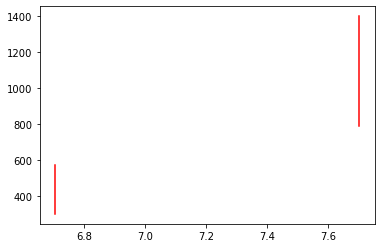

In [112]:
plt.plot([s1,s1],[T1,T2],'r',linewidth=1.5)
plt.plot([s3,s3],[T3,T4],'r',linewidth=1.5)

We will finally define the axis bounds for this diagram. It specify start and end points. For that, we will use the following command:

(6.2, 8.0, 175.0, 1700.0)

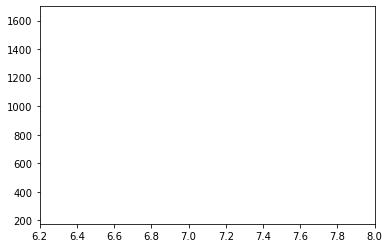

In [113]:
plt.axis([6.2,8 , 175,1700])

We will give names to the x and y axes. For that, we will use the following command:

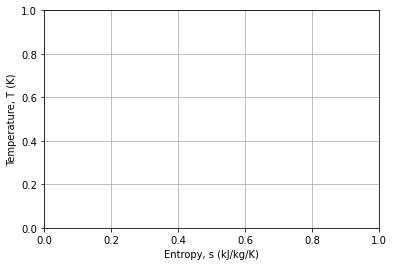

In [114]:
plt.xlabel('Entropy, s (kJ/kg/K)')
plt.ylabel('Temperature, T (K)')
plt.grid('on')

We will adjust thickness of graphic lines and text. I preferred 1f and 4f. You can choose 3f or 6f if you want. I used white background. You can change this with another color if you want. For that, we will use the following command:

In [115]:
# plt.text(s1-.1,T1,'(1)\nT={:.1f}\np={:.4f}'.format(T1,p1),
#    ha='right',backgroundcolor='white')
#plt.text(s1-.1,T2,'(2)\nT={:.1f}\np={:.4f}'.format(T2,p2),
#    ha='right',backgroundcolor='white')
#plt.text(s3+.1,T3,'(3)\nT={:.1f}\np={:.4f}'.format(T3,p3),
#    ha='left',backgroundcolor='white')
#plt.text(s3+.1,T4,'(4)\nT={:.1f}\np={:.4f}'.format(T4,p4),
#    ha='left',backgroundcolor='white')
#plt.text(6.3,1300,
#"""$\dot{{m}}$ = {:.4f}kg/s
#$p_r$={:.1f}
#$\eta$={:.4f}
#$\dot{{W}}_{{net}}$={:1}kW""".format(mdot,pr,n,Wnet),
#    backgroundcolor='white')

We will finish the T-S diagram by typing its name. For that, we will use the following command:

Text(0.5, 1.0, 'Brayton Cycle T-s Graphic')

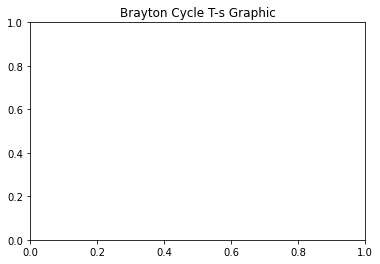

In [116]:
plt.title('Brayton Cycle T-s Graphic')

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 1.0, 'Brayton Cycle T-s Graphic')

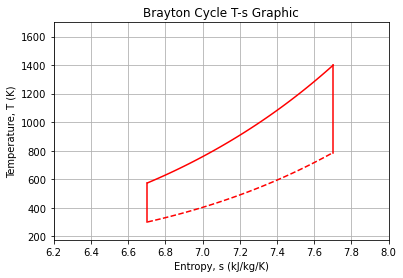

In [117]:
T = np.linspace(T2,T3)
plt.plot(air.s(T=T,p=p2),T,'r',linewidth=1.5)
T = np.linspace(T1,T4)
plt.plot(air.s(T=T,p=p1),T,'r--',linewidth=1.5)
plt.plot([s1,s1],[T1,T2],'r',linewidth=1.5)
plt.plot([s3,s3],[T3,T4],'r',linewidth=1.5)
plt.axis([6.2,8 , 175,1700])
plt.xlabel('Entropy, s (kJ/kg/K)')
plt.ylabel('Temperature, T (K)')
plt.grid('on')
plt.title('Brayton Cycle T-s Graphic')

Now we can build the P-V diagram. We must first call our code for the second chart . Then we will upload the data. P-V diagram consists of point coordinates. We need to load the diagram data for this. For that, we will use the following command:

In [118]:
plt.figure(2)
#plt.plot([x1,x2],[y1,y2])

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Now, we will build the limits. For that, we will use the following command:

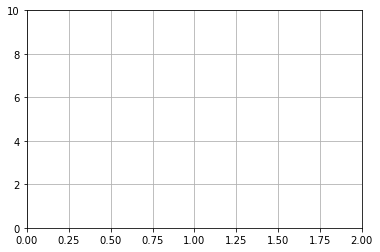

In [119]:
plt.axis([0,2 , 0,10])
plt.grid('on')

We will name axes and diagram. For that, we will use the following command:

Text(0, 0.5, 'Pressure, P (bar)')

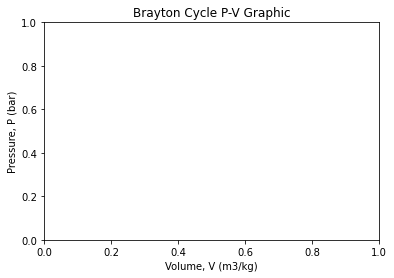

In [120]:
plt.title('Brayton Cycle P-V Graphic')
plt.xlabel('Volume, V (m3/kg)')
plt.ylabel('Pressure, P (bar)')

Our output diagram will be as follows:

We successfully built our P-v diagram. We will load the classic Bryton cycle diagram to understand how the Brayton cycle works. I will import the picture I made earlier as png. Matplotlib gives us this feature. I use the this codes for this:

In [122]:
import pyromat as pm
pm.config

     config_file : ['/opt/anaconda3/lib/python3.9/site-packages/pyrom...
  config_verbose : False
         dat_dir : ['/opt/anaconda3/lib/python3.9/site-packages/pyrom...
 dat_exist_fatal : False
   dat_overwrite : True
   dat_recursive : True
     dat_verbose : False
           def_T : 298.15
           def_p : 1.01325
     install_dir : '/opt/anaconda3/lib/python3.9/site-packages/pyromat'
         reg_dir : ['/opt/anaconda3/lib/python3.9/site-packages/pyrom...
 reg_exist_fatal : False
   reg_overwrite : True
     reg_verbose : False
     unit_energy : 'kJ'
      unit_force : 'N'
     unit_length : 'm'
       unit_mass : 'kg'
     unit_matter : 'kg'
      unit_molar : 'kmol'
   unit_pressure : 'bar'
unit_temperature : 'K'
       unit_time : 's'
     unit_volume : 'm3'
         version : '2.1.10'